# Inverse Problems Exercises: 2024s s03 (non-physics)
https://www.umm.uni-heidelberg.de/miism/

## Notes
* Please **DO NOT** change the name of the `.ipynb` file. 
* Please **DO NOT** import extra packages to solve the tasks. 
* Please put the `.ipynb` file directly into the `.zip` archive without any intermediate folder. 

## Please provide your personal information
* full name (Name): Quang Minh, Ngo

YOUR ANSWER HERE

## D01c: Wiener filter

In [179]:
import numpy as np
import matplotlib.pyplot as plt

In [180]:
file_gaussian = 'file_gaussian.npz'
with np.load(file_gaussian) as data:
    f_true = data['f_true']
    h_psf = data['h_psf']
    list_gn = data['list_gn']

### Imaging model
The imaging model can be represented by
$$
g = h \otimes f_\text{true}
= Af_\text{true}
= \mathcal{F}^{-1}\{ \mathcal{F}\{h\} \mathcal{F}\{f_\text{true}\} \},
$$
$$
g' = g + \epsilon.
$$
* $f_\text{true}$ is the input signal
* $h$ is the point spread function (kernel)
* $\otimes$ is the convolution operator
* $A$ is the Toeplitz matrix of $h$
* $\mathcal{F}$ and $\mathcal{F}^{-1}$ are the Fourier transform operator and inverse Fourier transform operator
* $\epsilon$ is the additive Gaussian noise
* $g$ is the filtered signal
* $g'$ is the noisy signal

### Fourier transform of the kernel
Implement the Fourier transform of the kernel $\mathcal{F}\{h\}$
* Given the kernel $h$
* Given the length of the transformed kernel $l$
* Pad zeros to both sides of the kernel
* Adjust the kernels as long as $l$
* Shift the origin of the kernels to the first element of the array
* Apply the Fourier transform to the shifted padded kernel (using `numpy.fft.fft()`)
* Implement the function `fft_kernel()` (using `numpy.array`)

Calculate the transformed kernel
* Apply the transform to `h_psf`
* Return the outputs of with the length of $100$, $1000$, $10000$, respectively
* Save the outputs in the variable `list_h_fft` (as `list` of `numpy.array`)

Display the result
* Plot the absolute value of the outputs in `list_h_fft` in the same order of the parameter options in the subplots of `axs`
* Plot the outputs properly in the frequency domain
* Plot the outputs with the marker "+"
* Add proper titles to the subplots of `axs`

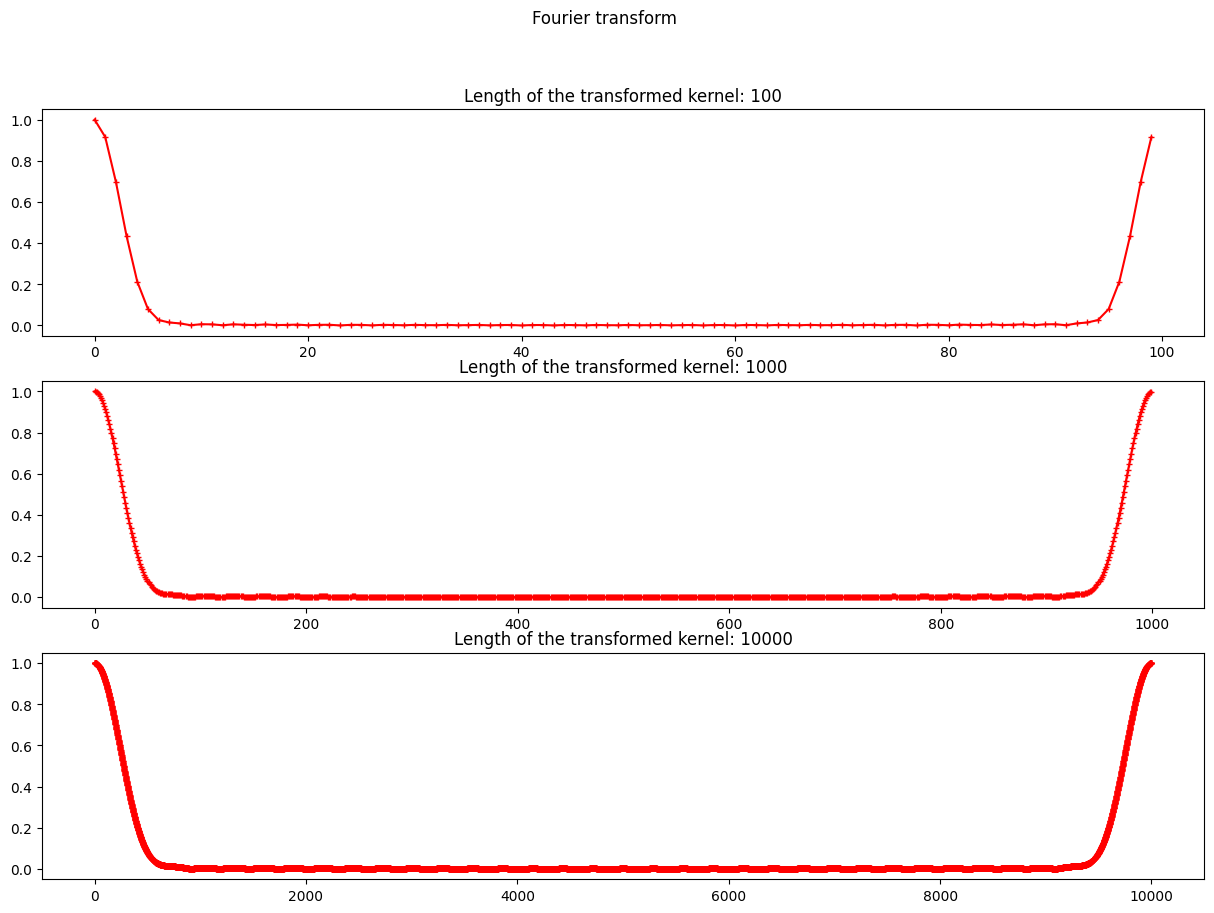

In [181]:
def fft_kernel(kernel, length):
    """Compute the discrete Fourier Transform of the kernel.

    :param kernel: 1d kernel of the system
    :param length: length of the transformed kernel
    :returns: Transformed kernel
    """
    pad_width = length - len(kernel)
    kernel_padded = np.pad(kernel, (pad_width//2, pad_width//2 + 1), mode='constant', constant_values=0)
    kernel_shifted = np.roll(kernel_padded, -pad_width//2 + 1)
    return np.fft.fft(kernel_shifted)

list_h_fft = [fft_kernel(h_psf, length) for length in [100,1000,10000]]
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('Fourier transform')
for i, h_fft in enumerate(list_h_fft):
    axs[i].plot(np.abs(h_fft), marker='+', markersize=5, color='red')
    axs[i].set_title(f'Length of the transformed kernel: {len(h_fft)}')

In [182]:
# This cell contains hidden tests.


In [183]:
# This cell contains hidden tests.


### Mean squared error
Implement the mean squared error (MSE)
$$
\operatorname{MSE}(\tilde f)=\frac{1}{n}\sum_{i=1}^n(f_{\text{true}i}-\tilde f_i)^2.
$$
* Given the true signal $f_\text{true}$
* Given the estimate $\tilde f$
* Implement the function `mean_squared_error()` (using `numpy.array`)


In [184]:
def mean_squared_error(f_true, f_est):
    """ Compute the mean squared error comparing to the true signal:

    :param f_true: True signal.
    :param f_est: Estimate of the signal.
    :returns: Mean squared error.
    """
    return np.mean((f_true - f_est)**2)

In [185]:
# This cell contains hidden tests.


### Inverse filter
Implement the inverse filter
$$
\tilde{f}_\text{inv} = \mathcal{F}^{-1}\{ \frac{1}{\mathcal{F}\{h\} + s^2} \cdot \mathcal{F}\{g'\} \}.
$$
* Given the kernel $h$
* Given the noisy signal $g'$
* Given the small positive parameter $s^2$
* Transform the kernel by `fft_kernel()`
* Implement the function `inverse_filter()` (using `numpy.array`)

Apply the inverse filter
* Apply the inverse filter to the noisy signals in `list_gn`
* Return the outputs with $s^2$ of $0.1$
* Save the outputs in the variable `list_f_inv` (as `list` of `numpy.array`)
* Save the mean squared error of each output comparing to `f_true` in the variable `list_mse_inv` (as `list`)

Display the result
* Plot the outputs in `list_f_inv` in the same order of the noisy signals in the subplots of `axs`
* Plot the corresponding noisy signal in each subplot (after the filter output)
* Plot the input signal `f_true` in each subplot (after the noisy signal)
* Show the legend in each subplot
* Show the case information in the titles to the subplots
* Show the mean squared error in `list_mse_inv` in the titles to the subplots

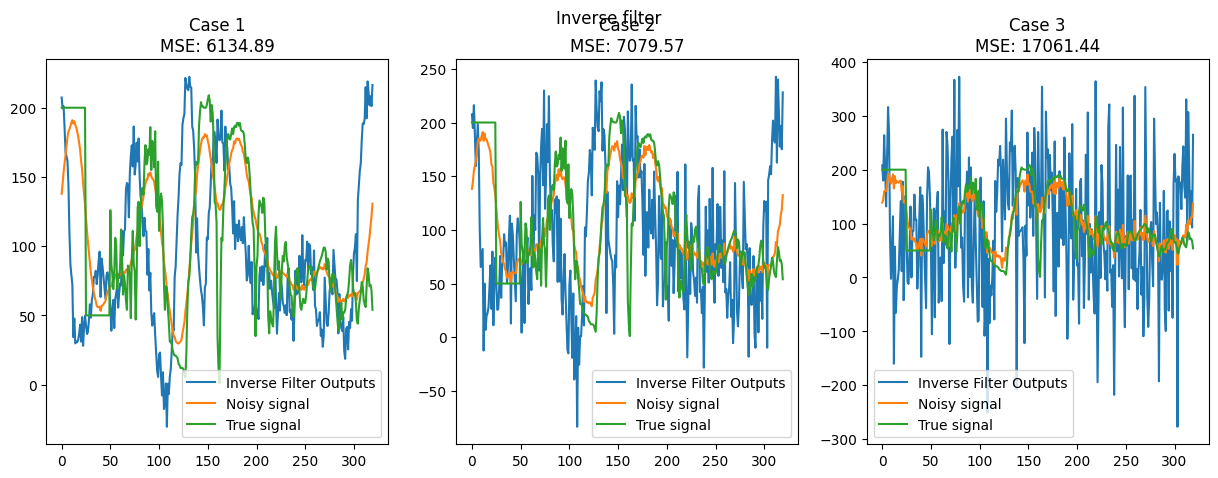

In [186]:
def inverse_filter(kernel, signal, s_sqr):
    """Apply an inverse filter kernel to a signal to deblur it.
    Use a small positive parameter s_sqr to avoid division by zero.

    :param kernel: 1d kernel of the system
    :param signal: 1d signal, which should be filtered
    :param s_sqr: Small positive parameter
    :returns: Filtered signal
    """
    kernel_fft = fft_kernel(kernel, len(signal))
    signal_fft = np.fft.fft(signal)
    return np.fft.ifft(signal_fft / (kernel_fft + s_sqr)).real

s_qrt = 0.1
list_f_inv = [inverse_filter(h_psf, gn, s_qrt) for gn in list_gn]
list_mse_inv = [mean_squared_error(f_true, f_inv) for f_inv in list_f_inv]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Inverse filter')

for i, (f_inv, gn, mse) in enumerate(zip(list_f_inv, list_gn, list_mse_inv)):
    axs[i].plot(f_inv, label='Inverse Filter Outputs')
    axs[i].plot(gn, label='Noisy signal')
    axs[i].plot(f_true, label='True signal')
    axs[i].set_title(f'Case {i+1}\nMSE: {mse:.2f}')
    axs[i].legend()


In [187]:
# This cell contains hidden tests.


In [188]:
# This cell contains hidden tests.


### Question: Inverse filter
What's the influence of $s^2$ on the result?

YOUR ANSWER HERE

### Estimated power spectrum
According to the imaging model, the noise could be estimated by
$$
\tilde{\epsilon}_\text{inv} = g' - h \otimes \tilde{f}_\text{inv},
$$
and the corresponding power spectra are
$$
P(\tilde{f}_\text{inv}) = |\mathcal{F}\{\tilde{f}_\text{inv}\}| ^2,
$$
$$
P(\tilde{\epsilon}_\text{inv}) = |\mathcal{F}\{\tilde{\epsilon}_\text{inv}\}| ^2.
$$

Display the result
* Plot the estimated power spectrum of the input signal and that of the noise in each subplot
* Show the plot with log scaling on the y-axis
* Show the legend in each subplot
* Show the case information in the titles to the subplots

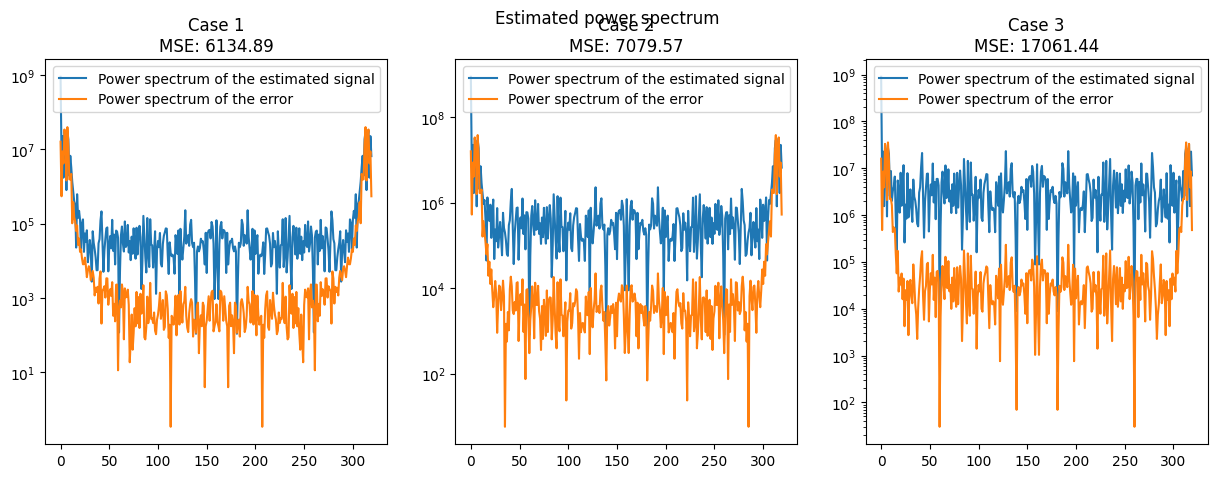

In [189]:
e_inv = np.array([gn - np.convolve(h_psf, f_inv, mode='same') for gn, f_inv in zip(list_gn, list_f_inv)])
p_f_inv = np.array([np.abs(np.fft.fft(f_inv))**2 for f_inv in list_f_inv])
p_e_inv = np.array([np.abs(np.fft.fft(e))**2 for e in e_inv])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Estimated power spectrum')

for i, (p_f, p_e, mse) in enumerate(zip(p_f_inv, p_e_inv, list_mse_inv)):
    axs[i].plot(p_f, label='Power spectrum of the estimated signal')
    axs[i].plot(p_e, label='Power spectrum of the error')
    axs[i].set_yscale('log')
    axs[i].set_title(f'Case {i+1}\nMSE: {mse:.2f}')
    axs[i].legend()


In [190]:
# This cell contains hidden tests.


### Wiener filter 1
See
* https://en.wikipedia.org/wiki/Wiener_deconvolution

Implement the Wiener filter
$$
\begin{align*}
\tilde{f}_\text{Wiener} &= \mathcal{F}^{-1}\{ W \cdot \mathcal{F}\{g'\} \} \\
 &= \mathcal{F}^{-1}\{ \frac{\mathcal{F}\{h\}^*}{|\mathcal{F}\{h\}|^2 + P(\epsilon)/P(f)} \cdot \mathcal{F}\{g'\} \} \\
 &= \mathcal{F}^{-1}\{ \frac{1}{\mathcal{F}\{h\}} \cdot \frac{|\mathcal{F}\{h\}|^2}{|\mathcal{F}\{h\}|^2 + P(\epsilon)/P(f)} \cdot \mathcal{F}\{g'\} \} \\
\end{align*}
$$
* Given the kernel $h$
* Given the noisy signal $g'$
* Given the power spectra $P(f)$ and $P(\epsilon)$
* Transform the kernel by `fft_kernel()`
* Implement the function `wiener_filter()` (using `numpy.array`)

Apply the Wiener filter
* Apply the Wiener filter to the noisy signals in `list_gn`
* Return the outputs with $P(f) = P(\tilde{f}_\text{inv})$ and $P(\epsilon) = P(\tilde{\epsilon}_\text{inv})$
* Save the outputs in the variable `list_f_wiener_1` (as `list` of `numpy.array`)
* Save the mean squared error of each output comparing to `f_true` in the variable `list_mse_wiener_1` (as `list`)

Display the result
* Plot the outputs in `list_f_wiener_1` in the same order of the noisy signals in the subplots of `axs`
* Plot the corresponding noisy signal in each subplot (after the filter output)
* Plot the input signal `f_true` in each subplot (after the noisy signal)
* Show the legend in each subplot
* Show the case information in the titles to the subplots
* Show the mean squared error in `list_mse_wiener_1` in the titles to the subplots

In [191]:
def wiener_filter(kernel, signal, P_f, P_e):
    """Apply a wiener filer on the signal to deblur and denoise it.

    :param kernel: 1d kernel of the system
    :param signal: 1d blurred signal with noise
    :param P_f: power spectrum of the deblurred signal
    :param P_e: power spectrum of the noise
    :returns: Deblured and denoised signal
    """
# YOUR CODE HERE
raise NotImplementedError()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Wiener filter 1')

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [ ]:
# This cell contains hidden tests.


In [ ]:
# This cell contains hidden tests.


### True power spectrum
According to the imaging model, the true noise is
$$
\epsilon_\text{true} = g' - h \otimes f_\text{true},
$$
and the corresponding power spectra are
$$
P(f_\text{true}) = |\mathcal{F}\{f_\text{true}\}| ^2,
$$
$$
P(\epsilon_\text{true}) = |\mathcal{F}\{\epsilon_\text{true}\}| ^2.
$$

Display the result
* Plot the true power spectrum of the input signal and that of the noise in each subplot
* Show the plot with log scaling on the y-axis
* Show the legend in each subplot
* Show the case information in the titles to the subplots

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('True power spectrum')

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# This cell contains hidden tests.


### Wiener filter 2
Apply the Wiener filter
* Apply the Wiener filter to the noisy signals in `list_gn`
* Return the outputs with $P(f) = P(f_\text{true})$ and $P(\epsilon) = P(\epsilon_\text{true})$
* Save the outputs in the variable `list_f_wiener_2` (as `list` of `numpy.array`)
* Save the mean squared error of each output comparing to `f_true` in the variable `list_mse_wiener_2` (as `list`)

Display the result
* Plot the outputs in `list_f_wiener_2` in the same order of the noisy signals in the subplots of `axs`
* Plot the corresponding noisy signal in each subplot (after the filter output)
* Plot the input signal `f_true` in each subplot (after the noisy signal)
* Show the legend in each subplot
* Show the case information in the titles to the subplots
* Show the mean squared error in `list_mse_wiener_2` in the titles to the subplots

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Wiener filter 2')

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# This cell contains hidden tests.


### Question: Wiener filter
Regarding the deblurring task, how sensitive is the reconstruction to estimated power spectrum?

YOUR ANSWER HERE